1. Import the liberies

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


2. The research question is: What is the correlation between 'overall rating' and 'power' (power, shot power, stamina, jumping, long shot)? And what is the linair regression model? 

3. Getting the data

In [208]:
data = pd.read_csv('fifa21_male2.csv')

In [209]:
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


4. Cleaning en wrangling

In [210]:
data.columns = data.columns.str.lower()
data

,id,name,age,ova,nationality,club,bov,bp,position,player photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


I can not see the colums, so there for I use this code

In [211]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
cols

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player photo',
 'club logo',
 'flag photo',
 'pot',
 'team & contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan date end',
 'value',
 'wage',
 'release clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading accuracy',
 'short passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk accuracy',
 'long passing',
 'ball control',
 'movement',
 'acceleration',
 'sprint speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot power',
 'jumping',
 'stamina',
 'strength',
 'long shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing tackle',
 'sliding tackle',
 'goalkeeping',
 'gk diving',
 'gk handling',
 'gk kicking',
 'gk positioning',
 'gk reflexes',
 'total stats',
 'base stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

Drop the columns I don't need

In [114]:
cols_to_keep = ['power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots', 'ova']

In [115]:
x = ['power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots']

In [116]:
y = ['ova']

In [117]:
data_4_regression = data.drop(data.columns.difference(cols_to_keep), axis=1)

In [118]:
df_x = data.drop(data.columns.difference(x), axis=1)

In [119]:
df_y = data.drop(data.columns.difference(y), axis=1)

In [120]:
data_4_regression

,ova,power,shot power,jumping,stamina,strength,long shots
0,69,347,74,68.0,69,68,68
1,71,324,75,54.0,64,60,71
2,71,284,72,58.0,29,56,69
3,68,239,63,NaN,51,66,59
4,81,297,67,40.0,58,62,70
...,...,...,...,...,...,...,...
17120,64,279,48,70.0,59,74,28
17121,56,271,51,62.0,53,57,48
17122,56,233,28,61.0,53,54,37
17123,62,261,51,72.0,57,48,33


Checking the data types

In [122]:
data_4_regression.dtypes

ova             int64
power           int64
shot power      int64
jumping       float64
stamina         int64
strength        int64
long shots      int64
dtype: object

Checking the nulls

In [123]:
data_4_regression.isna()

,ova,power,shot power,jumping,stamina,strength,long shots
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
17120,False,False,False,False,False,False,False
17121,False,False,False,False,False,False,False
17122,False,False,False,False,False,False,False
17123,False,False,False,False,False,False,False


In [124]:
count_nan = data_4_regression.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: 58


Checking the mean to replace the nulls with the mean.

In [125]:
mean_ova = data_4_regression['ova'].mean()
print(mean_ova)

66.96502189781022


In [126]:
mean_power = data_4_regression['power'].mean()
print(mean_power)

302.41477372262773


In [127]:
mean_shotpower = data_4_regression['shot power'].mean()
print(mean_shotpower)

59.711416058394164


In [128]:
mean_jumping = data_4_regression['jumping'].mean()
print(mean_jumping)

65.17021151930626


In [129]:
mean_stamina = data_4_regression['stamina'].mean()
print(mean_stamina)

63.30960583941606


In [130]:
mean_strength = data_4_regression['strength'].mean()
print(mean_strength)

65.30855474452555


In [131]:
mean_longshots = data_4_regression['long shots'].mean()
print(mean_longshots)

49.13570802919708


I could also have used the data descrition

In [132]:
data_4_regression.describe()

,ova,power,shot power,jumping,stamina,strength,long shots
count,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000
mean,66.965022,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708
std,6.864329,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862
min,38.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000
25%,62.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000
50%,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000
75%,72.000000,339.000000,70.000000,73.000000,73.000000,74.000000,64.000000
max,93.000000,444.000000,95.000000,95.000000,97.000000,97.000000,94.000000


I replace the nulls with the means

In [133]:
data_for_regression_without_0_jumping = data_4_regression['jumping'].replace(np.nan,65.0)

print(data_for_regression_without_0_jumping)

0        68.0
1        54.0
2        58.0
3        65.0
4        40.0
         ... 
17120    70.0
17121    62.0
17122    61.0
17123    72.0
17124    62.0
Name: jumping, Length: 17125, dtype: float64


In [134]:
data_for_regression_without_0_power = data_4_regression['power'].replace(np.nan,302)

print(data_for_regression_without_0_power)

0        347
1        324
2        284
3        239
4        297
        ... 
17120    279
17121    271
17122    233
17123    261
17124    288
Name: power, Length: 17125, dtype: int64


In [135]:
data_for_regression_without_0_shotpower = data_4_regression['shot power'].replace(np.nan,59)

print(data_for_regression_without_0_shotpower)

0        74
1        75
2        72
3        63
4        67
         ..
17120    48
17121    51
17122    28
17123    51
17124    58
Name: shot power, Length: 17125, dtype: int64


In [136]:
data_for_regression_without_0_stamina = data_4_regression['stamina'].replace(np.nan,63)

print(data_for_regression_without_0_stamina)

0        69
1        64
2        29
3        51
4        58
         ..
17120    59
17121    53
17122    53
17123    57
17124    55
Name: stamina, Length: 17125, dtype: int64


In [137]:
data_for_regression_without_0_strength = data_4_regression['strength'].replace(np.nan,65)

print(data_for_regression_without_0_strength)

0        68
1        60
2        56
3        66
4        62
         ..
17120    74
17121    57
17122    54
17123    48
17124    52
Name: strength, Length: 17125, dtype: int64


In [138]:
data_for_regression_without_0_ova = data_4_regression['ova'].replace(np.nan,66)

print(data_for_regression_without_0_ova)

0        69
1        71
2        71
3        68
4        81
         ..
17120    64
17121    56
17122    56
17123    62
17124    59
Name: ova, Length: 17125, dtype: int64


In [139]:
data_for_regression_without_0_longshots = data_4_regression['long shots'].replace(np.nan,49)

print(data_for_regression_without_0_longshots)

0        68
1        71
2        69
3        59
4        70
         ..
17120    28
17121    48
17122    37
17123    33
17124    61
Name: long shots, Length: 17125, dtype: int64


Now I create a new data set

In [140]:
data_4_regression['ova'] = data_for_regression_without_0_ova
data_4_regression['power'] = data_for_regression_without_0_power
data_4_regression['shot power'] = data_for_regression_without_0_shotpower
data_4_regression['jumping'] = data_for_regression_without_0_jumping
data_4_regression['stamina'] = data_for_regression_without_0_stamina
data_4_regression['strength'] = data_for_regression_without_0_strength
data_4_regression['long shots'] = data_for_regression_without_0_longshots
data_4_regression


,ova,power,shot power,jumping,stamina,strength,long shots
0,69,347,74,68.0,69,68,68
1,71,324,75,54.0,64,60,71
2,71,284,72,58.0,29,56,69
3,68,239,63,65.0,51,66,59
4,81,297,67,40.0,58,62,70
...,...,...,...,...,...,...,...
17120,64,279,48,70.0,59,74,28
17121,56,271,51,62.0,53,57,48
17122,56,233,28,61.0,53,54,37
17123,62,261,51,72.0,57,48,33


I check the nulls

In [141]:
count_nan = data_4_regression.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


5 EDA

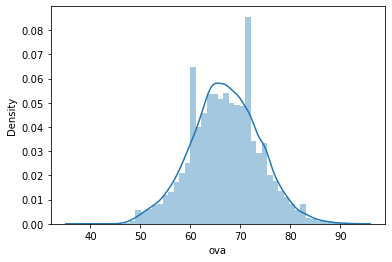

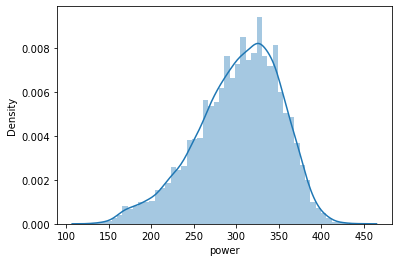

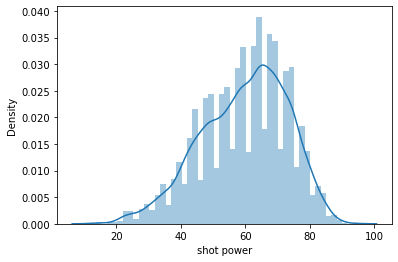

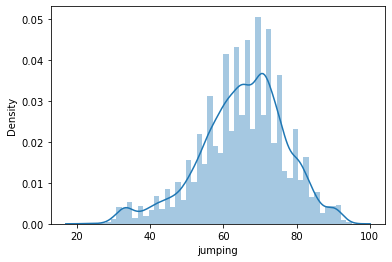

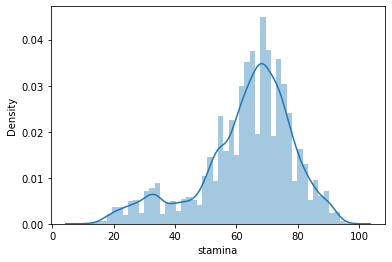

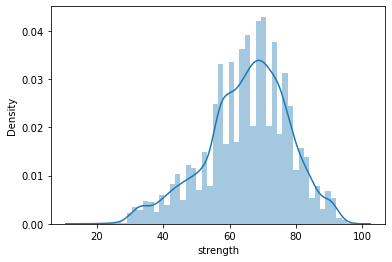

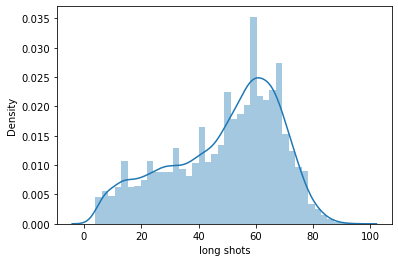

In [142]:
for col in data_4_regression.columns:
    sns.distplot(data_4_regression[col])
    plt.show()

What is the correlation between te variables?

In [143]:
data_4_regression.corr()

,ova,power,shot power,jumping,stamina,strength,long shots
ova,1.000000,0.546417,0.534829,0.258601,0.335108,0.338347,0.390849
power,0.546417,1.000000,0.766562,0.491956,0.761539,0.470354,0.808762
shot power,0.534829,0.766562,1.000000,0.108557,0.373183,0.169499,0.805135
jumping,0.258601,0.491956,0.108557,1.000000,0.320872,0.337261,0.092581
stamina,0.335108,0.761539,0.373183,0.320872,1.000000,0.230818,0.554911
strength,0.338347,0.470354,0.169499,0.337261,0.230818,1.000000,0.043355
long shots,0.390849,0.808762,0.805135,0.092581,0.554911,0.043355,1.000000


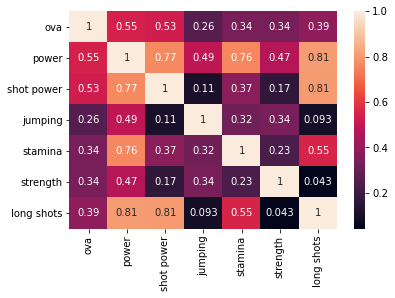

In [144]:
sns_plot = sns.heatmap(data_4_regression.corr(), annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()

I plot the ova with the other values. Starting the the values that have the highest correlation.

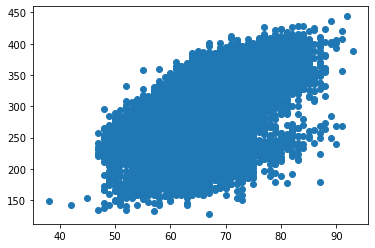

In [145]:
plt.scatter(data_4_regression['ova'], data_4_regression['power'])
plt.show()

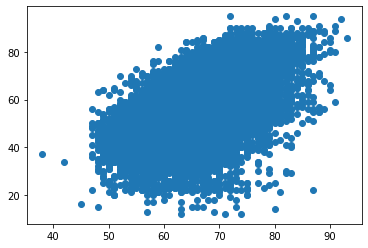

In [146]:
plt.scatter(data_4_regression['ova'], data_4_regression['shot power'])
plt.show()

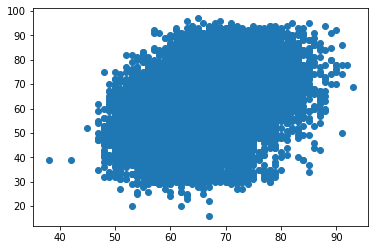

In [147]:
plt.scatter(data_4_regression['ova'], data_4_regression['strength'])
plt.show()

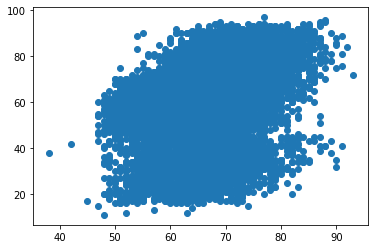

In [148]:
plt.scatter(data_4_regression['ova'], data_4_regression['stamina'])
plt.show()

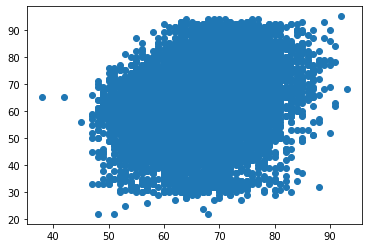

In [149]:
plt.scatter(data_4_regression['ova'], data_4_regression['jumping'])
plt.show()

6. Analysing

Make the model

In [173]:
X = data_4_regression.drop(['ova'], axis=1)
y = data_4_regression['ova']

In [174]:
from sklearn.model_selection import train_test_split

In [187]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
lm = LinearRegression() 
lm.fit(X_train, y_train) 

LinearRegression()

In [206]:
predictions = lm.predict(X_test) # predict some values

rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.38
RMSE: 5.391062993322687
MAE: 4.279425134183728


y = ax + b
a = coeffient 
b = slobe 


what is the slobe and the coeffient?

In [190]:
lm.coef_

array([-0.02446533,  0.31787239,  0.08294934,  0.08667548,  0.12013115,
       -0.03525315])

In [191]:
lm.intercept_

38.360941717872464

In [192]:
def mypredi(x):
    return (lm.coef_[0]*x['power'])+(lm.coef_[1]*x['shot power'])+(lm.coef_[2]*x['jumping'])+(lm.coef_[3]*x['stamina'])+(lm.coef_[4]*x['strength'])+(lm.coef_[5]*x['long shots'])+lm.intercept_

In [197]:
X_train.apply(mypredi,axis=1)

7046     65.732236
14127    59.301874
3508     71.888151
10384    65.553168
14640    64.785967
           ...    
11284    58.538533
11964    60.303496
5390     67.029603
860      65.701494
15795    65.268879
Length: 11987, dtype: float64

Predict the results using lm.predict

In [198]:
result = X_test.copy()
result['predictions'] = lm.predict(X_test)
result['true'] = y_test.copy()

In [204]:
result

,power,shot power,jumping,stamina,strength,long shots,predictions,true
15195,292,58,62.0,44,80,48,66.528586,59
14193,267,58,52.0,59,47,51,63.540771,65
16722,256,40,56.0,61,69,30,61.976536,62
8037,308,56,66.0,66,78,42,67.711311,68
6350,372,77,71.0,79,76,69,73.170281,76
...,...,...,...,...,...,...,...,...
7576,297,55,61.0,54,75,52,65.494780,61
2030,380,81,75.0,68,84,72,74.479705,77
11632,180,47,34.0,20,73,6,62.009028,65
39,254,72,65.0,58,59,65,70.248729,75


In [199]:
X_test

,power,shot power,jumping,stamina,strength,long shots
15195,292,58,62.0,44,80,48
14193,267,58,52.0,59,47,51
16722,256,40,56.0,61,69,30
8037,308,56,66.0,66,78,42
6350,372,77,71.0,79,76,69
...,...,...,...,...,...,...
7576,297,55,61.0,54,75,52
2030,380,81,75.0,68,84,72
11632,180,47,34.0,20,73,6
39,254,72,65.0,58,59,65


In [200]:
X_train

,power,shot power,jumping,stamina,strength,long shots
7046,313,62,81.0,70,39,61
14127,268,25,64.0,87,64,28
3508,368,71,71.0,89,72,65
10384,289,66,40.0,62,57,64
14640,246,64,34.0,59,47,42
...,...,...,...,...,...,...
11284,245,31,66.0,68,50,30
11964,177,43,44.0,23,60,7
5390,329,63,60.0,83,57,66
860,300,53,65.0,68,68,46


What is the plot of the regression? 

<AxesSubplot:xlabel='true', ylabel='predictions'>

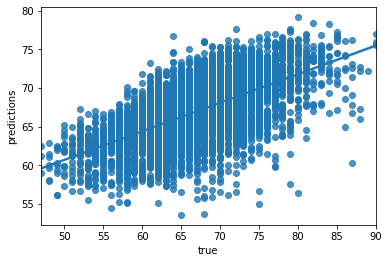

In [201]:
sns.regplot(result['true'], result['predictions'])